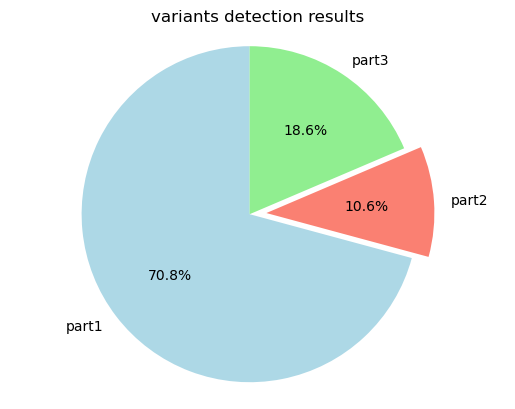

In [7]:
import matplotlib.pyplot as plt

# 数据准备
data = [80, 12, 21]
labels_ = ['剩余位点', 'MSI区域或背景信号过高', 'AF低于10%']
labels = ["part1", 'part2', 'part3']
colors = ['lightblue', 'salmon', 'lightgreen']
explode = (0, 0.1, 0)  # 将第二块(MSI区域或背景信号过高)稍微分离出来

# 绘制饼图
plt.pie(data, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 保证饼图是一个圆
plt.title('variants detection results')
plt.show()

In [35]:
import torch
import numpy as np
import os
from Bio import SeqIO

In [32]:
path="/home/jovyan/work/insilico_translation/encode_base_type1_maxlen75_trainratio80/train"
transcriptid="NM_000019"
labels = torch.load(os.path.join(path, transcriptid+"_labels.pt"),weights_only=True)
for i,value in enumerate(labels):
    if value >= 1:
        print(i,int(value.item()))

40 2
41 2
42 2
1321 1
1322 1
1323 1


In [39]:
path="/home/jovyan/work/insilico_translation/encoded_onehot_type3_maxlen75_trainratio80/validation_check2"
transcriptid="NM_000014"
labels = torch.load(os.path.join(path, transcriptid+"_labels.pt"),weights_only=True)
for i,value in enumerate(labels):
    if value[0] == 1:
        print(i,value)
    if value[1] == 1:
        print(i,value)

70 tensor([1, 0, 0])
71 tensor([1, 0, 0])
72 tensor([1, 0, 0])
4492 tensor([0, 1, 0])
4493 tensor([0, 1, 0])
4494 tensor([0, 1, 0])


In [15]:
transcriptid="NM_000019"
labels = torch.load(os.path.join(path, transcriptid+"_labels.pt"),weights_only=True)
for i,value in enumerate(labels):
    if value >= 1:
        print(i,int(value.item()))

40 2
41 2
42 2
1321 1
1322 1
1323 1


In [17]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [43]:
?torch.reshape

Docstring:
reshape(input, shape) -> Tensor

Returns a tensor with the same data and number of elements as :attr:`input`,
but with the specified shape. When possible, the returned tensor will be a view
of :attr:`input`. Otherwise, it will be a copy. Contiguous inputs and inputs
with compatible strides can be reshaped without copying, but you should not
depend on the copying vs. viewing behavior.

See :meth:`torch.Tensor.view` on when it is possible to return a view.

A single dimension may be -1, in which case it's inferred from the remaining
dimensions and the number of elements in :attr:`input`.

Args:
    input (Tensor): the tensor to be reshaped
    shape (tuple of int): the new shape

Example::

    >>> a = torch.arange(4.)
    >>> torch.reshape(a, (2, 2))
    tensor([[ 0.,  1.],
            [ 2.,  3.]])
    >>> b = torch.tensor([[0, 1], [2, 3]])
    >>> torch.reshape(b, (-1,))
    tensor([ 0,  1,  2,  3])
Type:      builtin_function_or_method

In [44]:
?torch.argmax

Docstring:
argmax(input) -> LongTensor

Returns the indices of the maximum value of all elements in the :attr:`input` tensor.

This is the second value returned by :meth:`torch.max`. See its
documentation for the exact semantics of this method.

.. note:: If there are multiple maximal values then the indices of the first maximal value are returned.

Args:
    input (Tensor): the input tensor.

Example::

    >>> a = torch.randn(4, 4)
    >>> a
    tensor([[ 1.3398,  0.2663, -0.2686,  0.2450],
            [-0.7401, -0.8805, -0.3402, -1.1936],
            [ 0.4907, -1.3948, -1.0691, -0.3132],
            [-1.6092,  0.5419, -0.2993,  0.3195]])
    >>> torch.argmax(a)
    tensor(0)

.. function:: argmax(input, dim, keepdim=False) -> LongTensor
   :noindex:

Returns the indices of the maximum values of a tensor across a dimension.

This is the second value returned by :meth:`torch.max`. See its
documentation for the exact semantics of this method.

Args:
    input (Tensor): the input tensor

In [45]:
a = torch.randn(4, 3)

In [46]:
a

tensor([[ 1.3013e+00, -2.6037e+00,  8.4664e-01],
        [ 2.2084e-03, -1.0208e+00, -9.2388e-01],
        [-1.4107e+00,  2.9467e-01, -3.3443e-01],
        [-1.4928e+00, -2.0301e+00,  6.5146e-01]])

In [47]:
torch.argmax(a, dim=1)

tensor([0, 0, 1, 2])

In [48]:
torch.argmax(a, dim=0)

tensor([0, 2, 0])

In [49]:
a.argmax(dim=1)

tensor([0, 0, 1, 2])

In [3]:
import pickle

# 读取pkl文件
pkl_file = "/home/jovyan/work/insilico_translation/embedding_type3_maxlen9995_ratio80_NM_NR/TRANSAID_Embedding_v2_batch4_NM_matching_predictions.pkl"

with open(pkl_file, 'rb') as f:
    predictions = pickle.load(f)

In [4]:
# 查找特定转录本
target_id = "NM_001258253"
for item in predictions:
    if item['transcript_id'] == target_id:
        print("Found transcript:", target_id)
        print("\nPredictions:", item['predictions'])  # 预测的标签序列
        print("\nPrediction probabilities:", item['predictions_probs'])  # 预测的概率值
        print("\nTrue labels:", item['true_labels'])  # 真实标签
        print("\nSequence length:", item['length'])  # 序列长度
        print("\nIs match?:", item['is_match'])  # 是否匹配

        for i, probs in enumerate(item['predictions_probs']):
             print(f"{i}: [{', '.join(f'{p:.2f}' for p in probs)}]")
else:
    print(f"Transcript {target_id} not found in predictions")

Found transcript: NM_001258253

Predictions: [2 2 2 ... 2 2 2]


KeyError: 'predictions_probs'